# Цикл Ренкина

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from src.loader import SaturationLoader

In [2]:
saturation_loader = SaturationLoader()

In [3]:
T_saturation, S_saturation, H_saturation = saturation_loader.get_data()

In [12]:
# Укажите точки цикла Ренкина
# point = [S, H, T]
point_1 = [1.09083, 226.16, 30]
point_2 = [1.09083, 227.457, 40]
point_3 = [1.41283, 344.259, 150]
point_4 = [1.6749, 454.6, 150]
point_5 = [1.6854, 459.8, 170]
point_6 = [1.6804, 400.1, 30]

In [17]:
S_RENKINE = [point_1[0], point_2[0], point_3[0], point_4[0], point_5[0], point_6[0], point_1[0]]
H_RENKINE = [point_1[1], point_2[1], point_3[1], point_4[1], point_5[1], point_6[1], point_1[1]]
T_RENKINE = [point_1[2], point_2[2], point_3[2], point_4[2], point_5[2], point_6[2], point_1[2]]

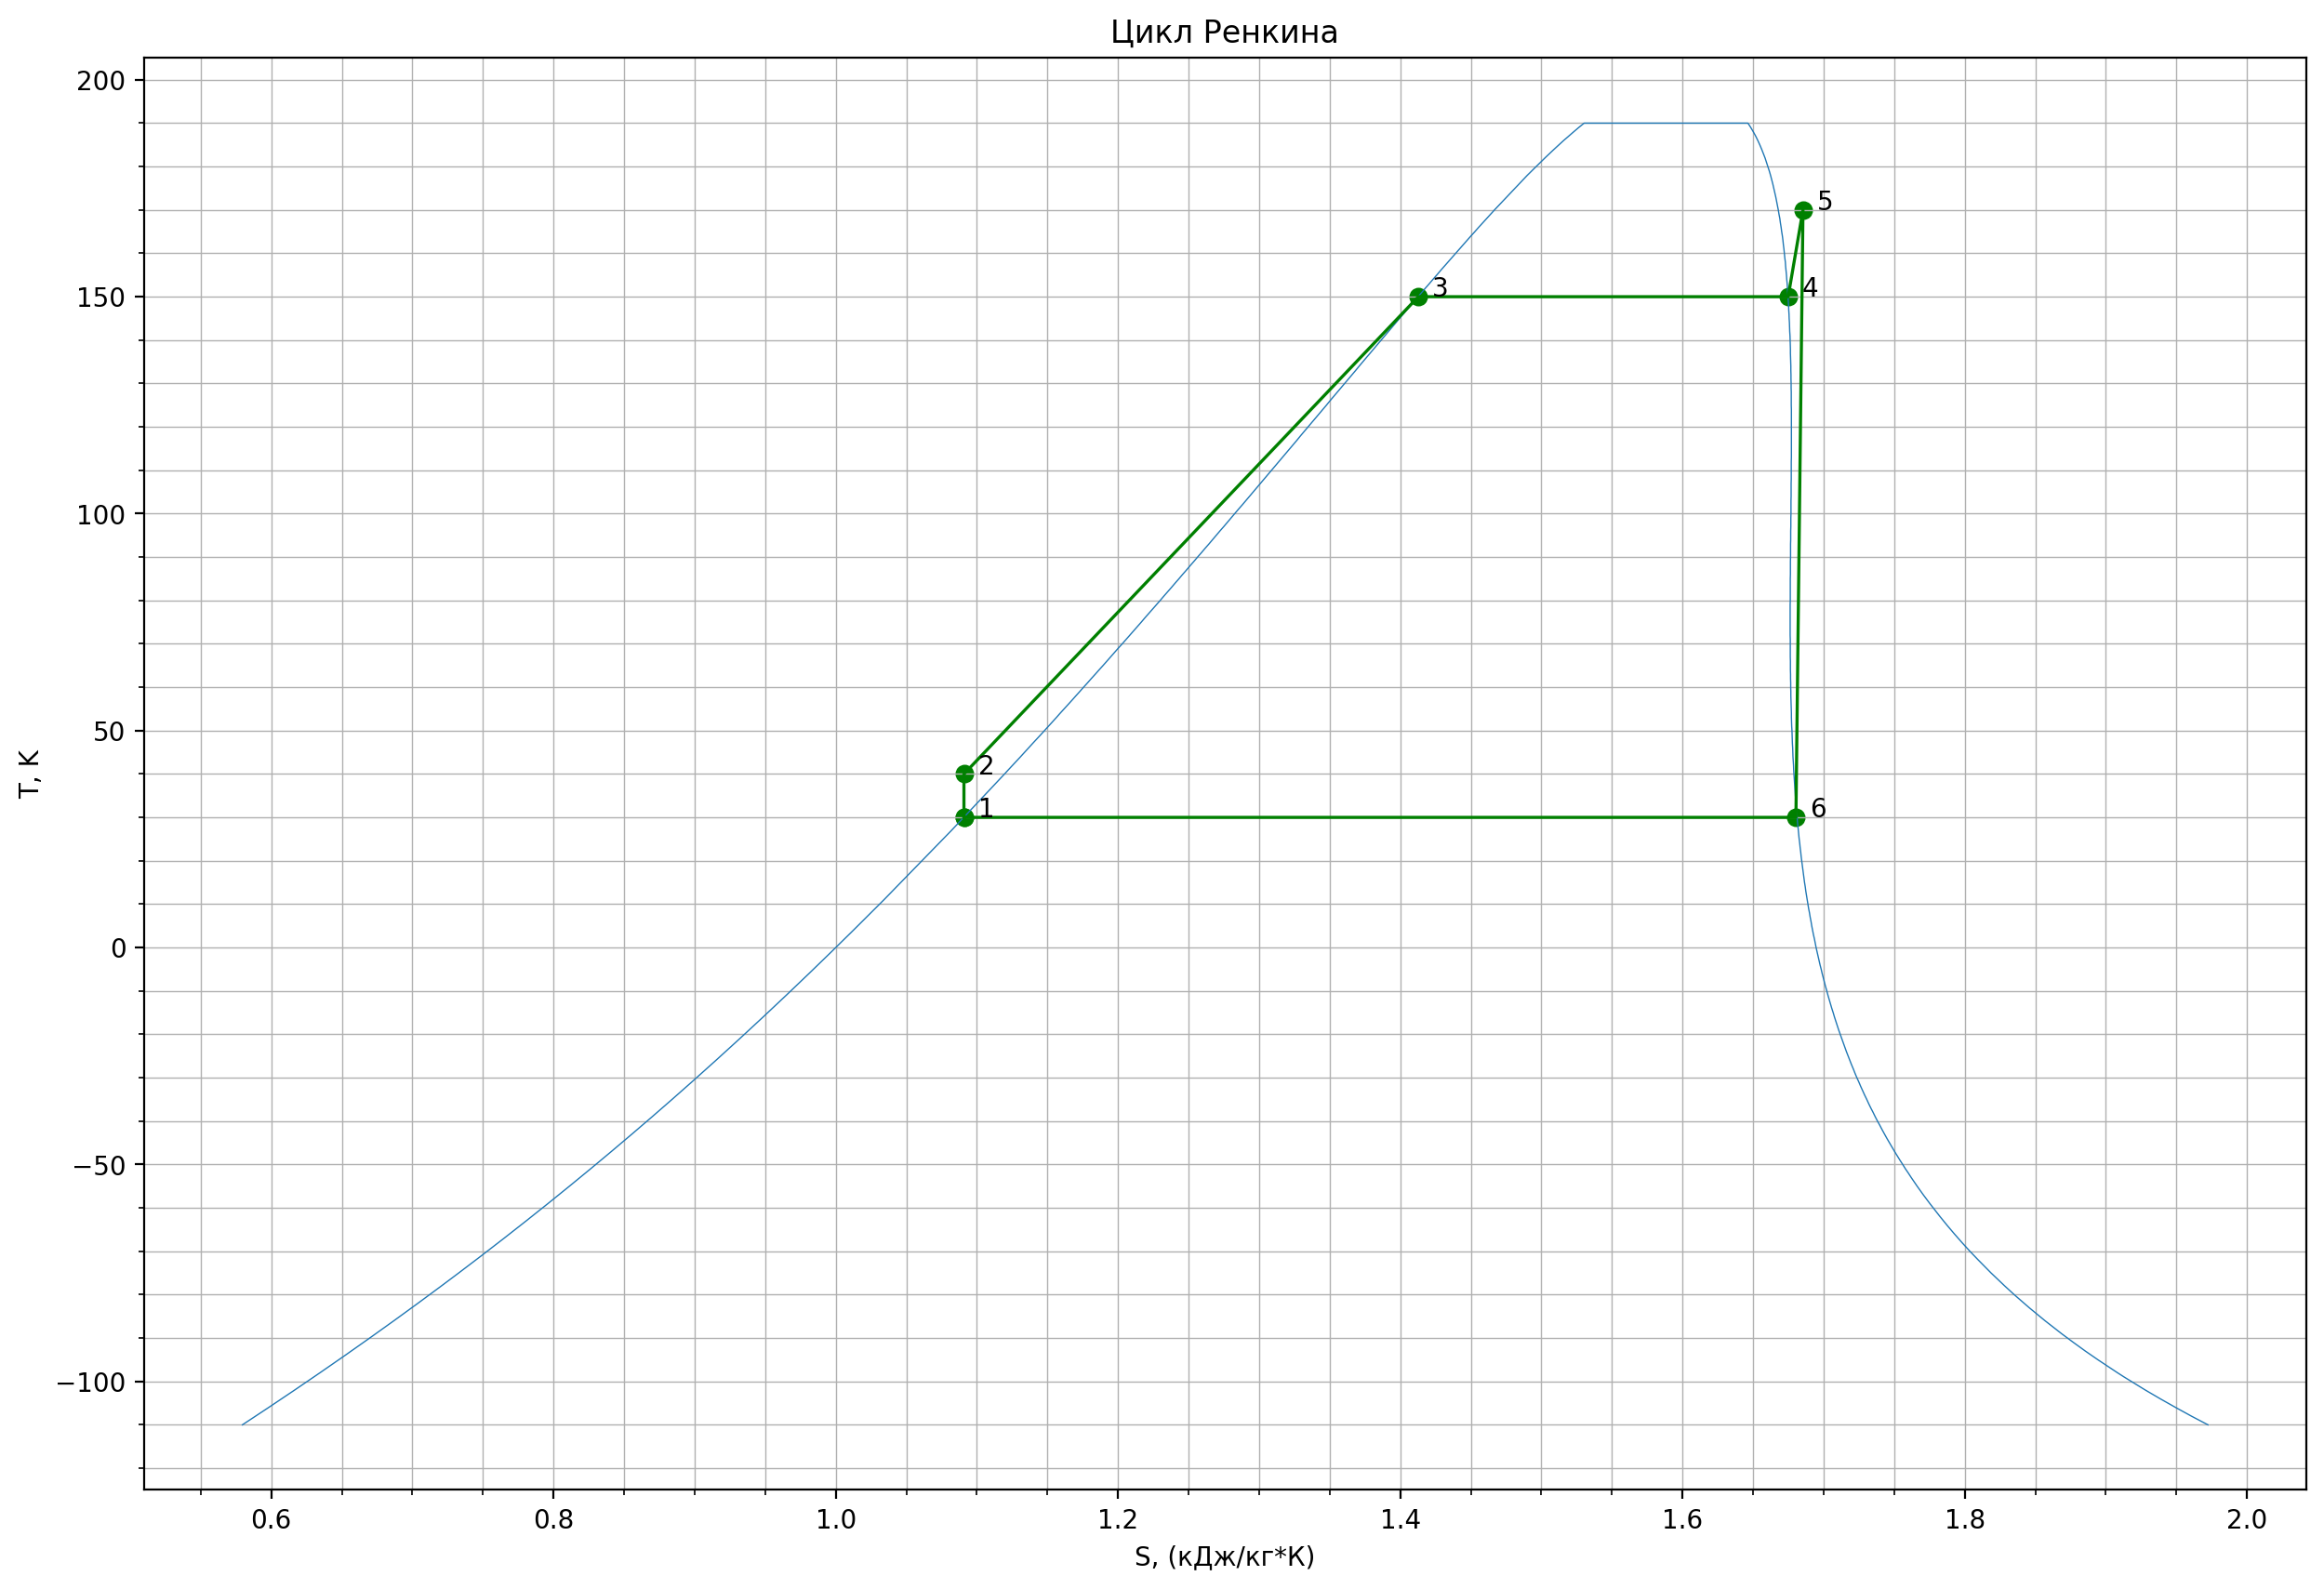

In [18]:
delta = 0.01

plt.subplots(figsize=(15, 10), dpi=200)
plt.plot(S_saturation, T_saturation, linewidth=0.5)
plt.plot(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
plt.scatter(S_RENKINE, T_RENKINE, color='g', linewidth=1.2)
for i in range(len(S_RENKINE) - 1):
    plt.text(
            S_RENKINE[i] + delta, 
            T_RENKINE[i] + delta, 
            f"{i + 1}", 
            fontsize=10, 
            color='black', 
            bbox=dict(facecolor='none', alpha=0.3, edgecolor='none')
    )
plt.ylabel("T, K")
plt.xlabel("S, (кДж/кг*К)")
plt.title("Цикл Ренкина")
plt.grid(True, which='both', linewidth=0.5)
plt.minorticks_on() 
plt.show()

In [15]:
A_nasos = H_RENKINE[1] - H_RENKINE[0]
print(f"Работа насоса: {A_nasos}\n")

A_turbine = H_RENKINE[4] - H_RENKINE[5]
print(f"Работа турбины: {A_turbine}\n")

n_RENKINE = (A_turbine - A_nasos) / (H_RENKINE[4] - H_RENKINE[1])
print(f"КПД Реникина: {n_RENKINE}\n")

n_KARNO = 1 - (min(T_RENKINE ) + 273.15) / (max(T_RENKINE) + 273.15)
print(f"КПД Карно: {n_KARNO}\n")

Работа насоса: 1.296999999999997

Работа турбины: 59.69999999999999

КПД Реникина: 0.2513654381668481

КПД Карно: 0.31592011734175784

